# Zoo Animal Classification

This dataset consists of 101 animals from a zoo.
There are 16 variables with various traits to describe the animals.
The 7 Class Types are: Mammal, Bird, Reptile, Fish, Amphibian, Bug and Invertebrate

The purpose for this dataset is to be able to predict the classification of the animals, based upon the variables.

zoo.csv
Attribute Information: (name of attribute and type of value domain)

- animal_name: Unique for each instance
- hair Boolean
- feathers Boolean
- eggs Boolean
- milk Boolean
- airborne Boolean
- aquatic Boolean
- predator Boolean
- toothed Boolean
- backbone Boolean
- breathes Boolean,
- venomous Boolean
- fins Boolean
- legs Numeric (set of values: {0,2,4,5,6,8})
- tail Boolean
- domestic Boolean
- catsize Boolean
- class_type Numeric (integer values in range [1,7]).

class.csv:
This csv describes the dataset.

- Class_Number Numeric (integer values in range [1,7])
- NumberOfAnimalSpeciesIn_Class Numeric
- Class_Type character -- The actual word description of the class
- Animal_Names character -- The list of the animals that fall in the category of the class.

We have implemented feature extraction using Principle Component Analysis(PCA) technique on our dataset. We have also implemented multiclass classification using the following models:
- 1.K-Nearest Neighbor Algorithm
- 2.Decision Tree
- 3.Random Forest
- 4.Gradient Boosting
- 5.Naive Bayes

We have calculated the accuracy of the models and plotted a bar graph comparing the accuracies.


## Preprocessing - Importing the libraries

In [68]:
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [69]:
#getting the data
df = pd.read_csv('zoo.csv')
pd.options.display.max_columns = None
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


### - Class 1- Mammal 
### - Class 2- Bird  
### - Class 3- Reptile  
### - Class 4- Fish  
### - Class 5-Amphibian  
### - Class 6- Bug  
### - Class 7-Invertebrate

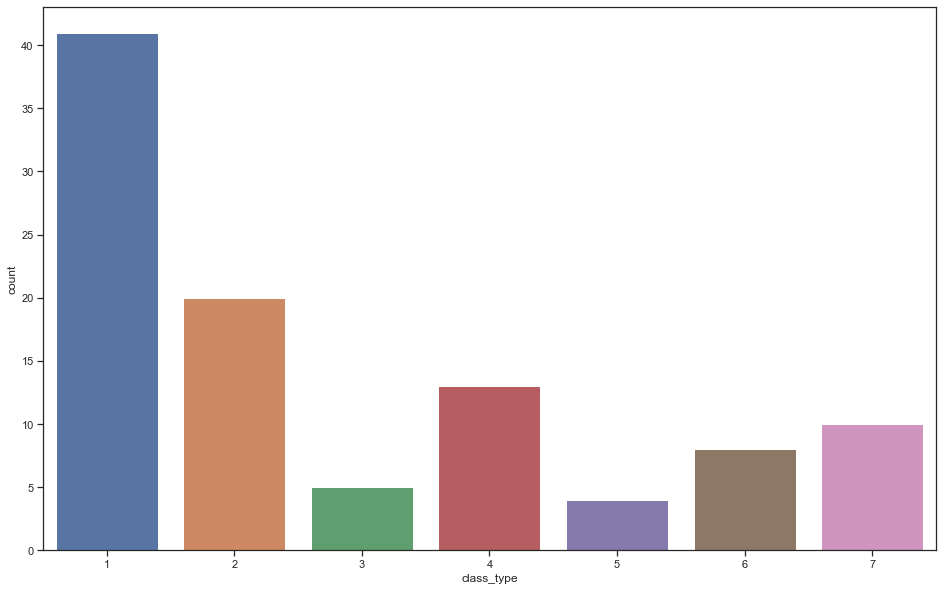

In [70]:
#plotting Class Vs Count of animals per class
df['class_type'].value_counts()
sns.set(style="ticks")
f = sns.countplot(x="class_type", data=df )
plt.show()

In [71]:
# Class and corresponding value count
df['class_type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

In [72]:
#Checking for missing data and calculating percentage of missing data per column
percent_missing = df.isnull().sum() * 100 / len(df)
missing_values = pd.DataFrame({'percent_missing': percent_missing})
missing_values.sort_values(by ='percent_missing' , ascending=False)

,percent_missing
animal_name,0.0
hair,0.0
catsize,0.0
domestic,0.0
tail,0.0
legs,0.0
fins,0.0
venomous,0.0
breathes,0.0
backbone,0.0


In [73]:
#Giving integer values corresponding to the animal_names strings for easier data handling
#Thus each animal is represented by its corresponding integer value instead of its name
factor = pd.factorize(df['animal_name'])
df.animal_name = factor[0]
definitions = factor[1]
print(df.animal_name.head())
print(definitions)


0    0
1    1
2    2
3    3
4    4
Name: animal_name, dtype: int64
Index(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam', 'crab',
       'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove', 'duck',
       'elephant', 'flamingo', 'flea', 'frog', 'fruitbat', 'giraffe', 'girl',
       'gnat', 'goat', 'gorilla', 'gull', 'haddock', 'hamster', 'hare', 'hawk',
       'herring', 'honeybee', 'housefly', 'kiwi', 'ladybird', 'lark',
       'leopard', 'lion', 'lobster', 'lynx', 'mink', 'mole', 'mongoose',
       'moth', 'newt', 'octopus', 'opossum', 'oryx', 'ostrich', 'parakeet',
       'penguin', 'pheasant', 'pike', 'piranha', 'pitviper', 'platypus',
       'polecat', 'pony', 'porpoise', 'puma', 'pussycat', 'raccoon',
       'reindeer', 'rhea', 'scorpion', 'seahorse', 'seal', 'sealion',
       'seasnake', 'seawasp', 'skimmer', 'skua', 'slowworm', 'slug', 'sole',
       'sparrow', 'squirrel', 'starfish'

In [74]:
#We can now observe the change in the animal_name column
df.head(10)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,6,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,7,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,8,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,9,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


#### Grid of Subplots

Different pair of variables for each subplot

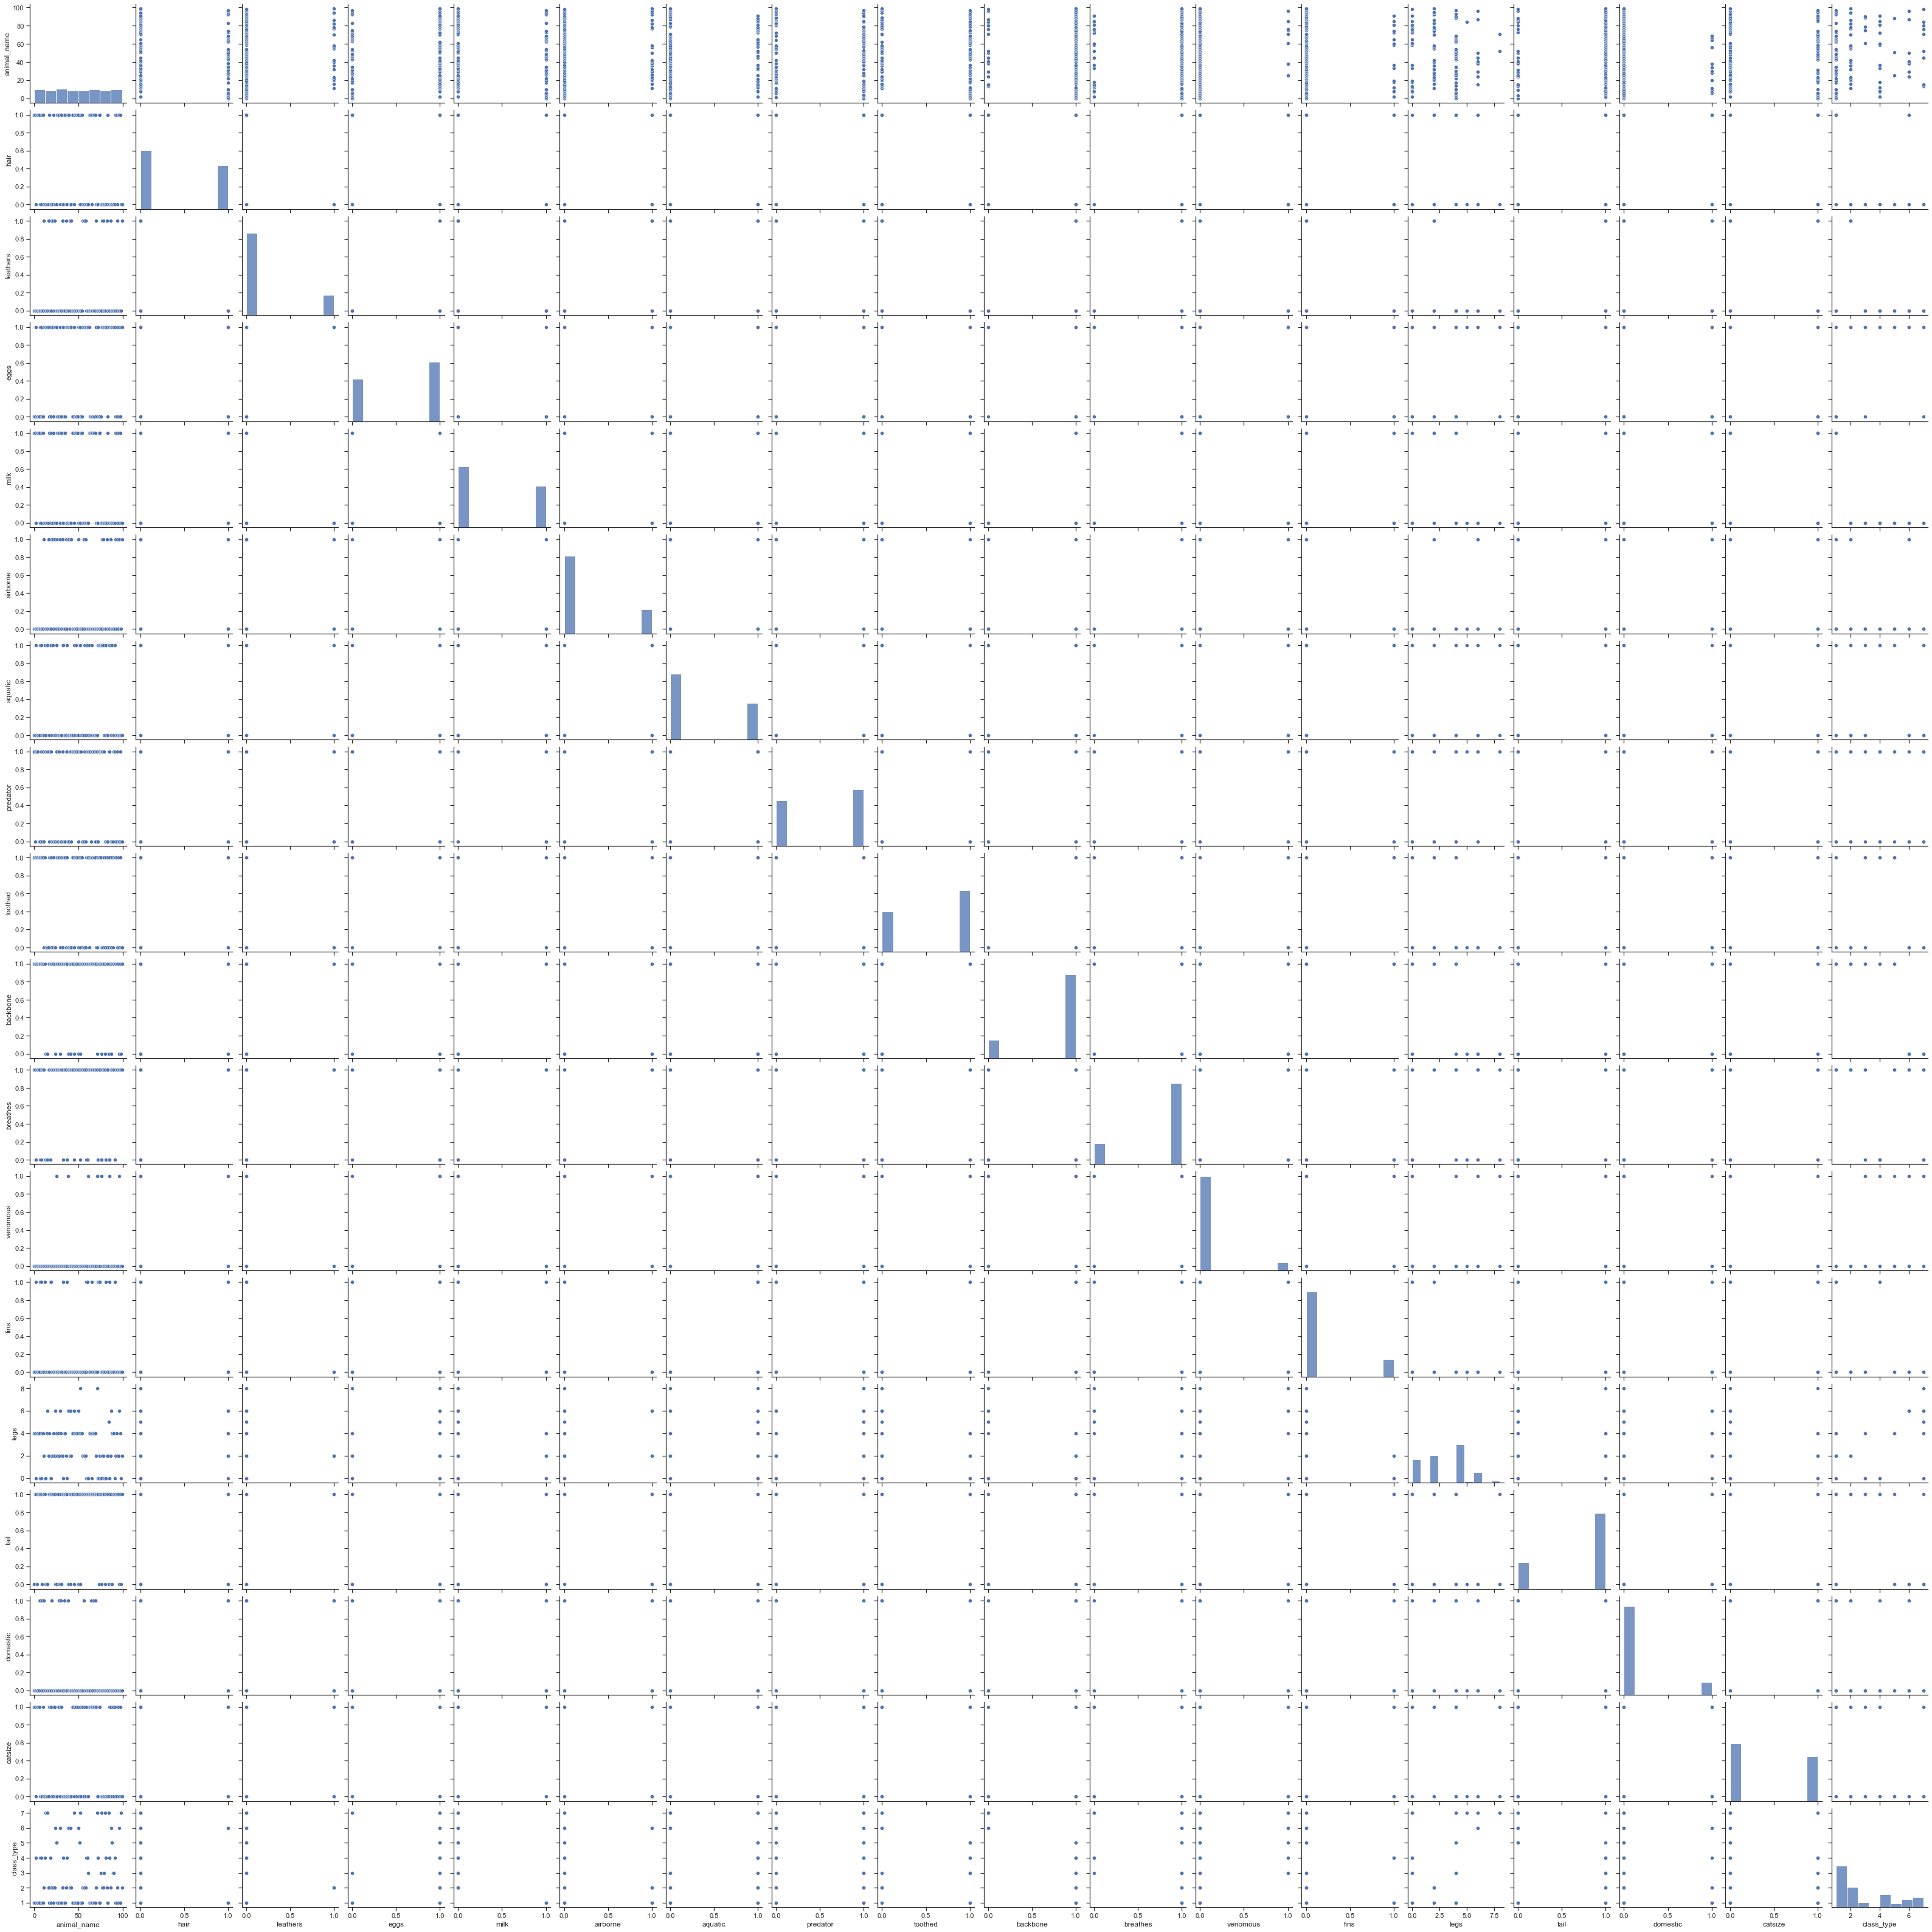

In [75]:
sns.pairplot(df)

#### Correlation matrix between the attributes

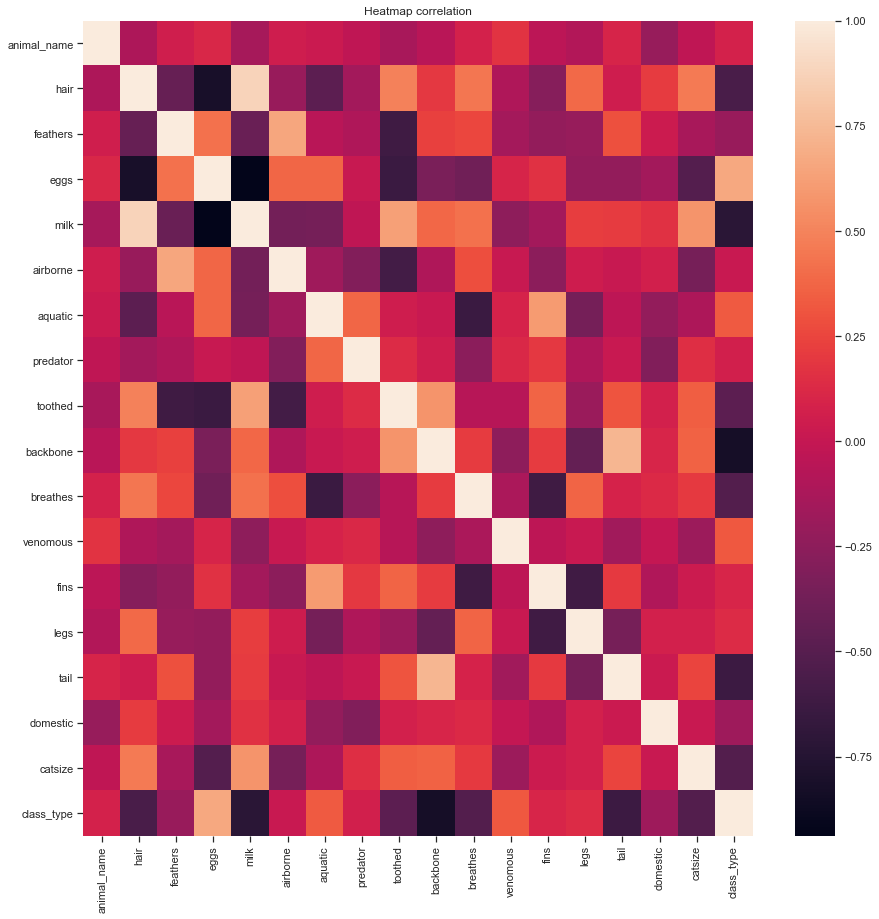

In [76]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr()) 

plt.title('Heatmap correlation')
plt.show()

### HeatMap of Features for the Classes

Text(0.5, 1.0, 'HeatMap of Features for the Classes')

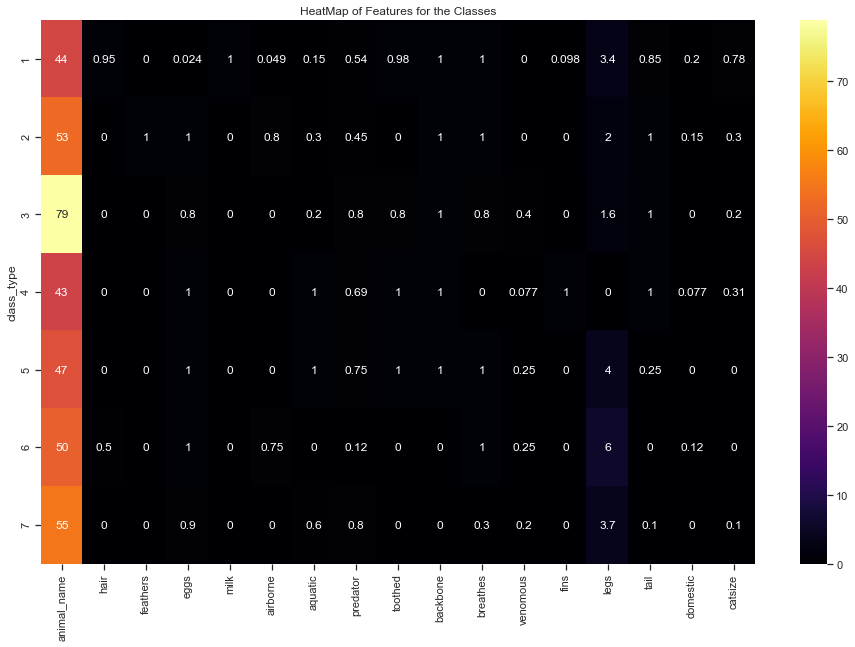

In [77]:
#This gives us a much clearer idea of what features play a more or less important role in identifying certain class types.
df_temp = df.groupby(by='class_type').mean()
plt.rcParams['figure.figsize'] = (16,10) 
sns.heatmap(df_temp, annot=True, cmap="inferno")
ax = plt.gca()
ax.set_title("HeatMap of Features for the Classes")

In [78]:
#Now split the dataset into independent and dependent variables
#X is the independent set while Y is the dependent set
X = df.drop(['class_type'], axis = 1)
Y = df['class_type']

# Feature Extraction

### Principal Component Analysis (PCA)

PCA is one of the most used linear dimensionality reduction technique. When using PCA, we take as input our original data and try to find a combination of the input features which can best summarize the original data distribution so that to reduce its original dimensions. PCA is able to do this by maximizing variances and minimizing the reconstruction error by looking at pair wised distances. In PCA, our original data is projected into a set of orthogonal axes and each of the axes gets ranked in order of importance. 

PCA is an unsupervised learning algorithm, therefore it doesn't care about the data labels but only about variation. This can lead in some cases to misclassification of data.

In [79]:
#Standardizing the variables
#Importing standardscalar module 
from sklearn.preprocessing import StandardScaler
  
scalar = StandardScaler()
  
# fitting
scalar.fit(X)
scaled_data = scalar.transform(X)
  
# Importing PCA
from sklearn.decomposition import PCA
  
# Let's say, components = 4
pca = PCA(n_components = 4)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
  
x_pca.shape

(101, 4)

In [80]:
PCA_X = pd.DataFrame(data = x_pca, columns = ['PC1', 'PC2','PC3','PC4'])

In [81]:
PCA_X.head(10)

,PC1,PC2,PC3,PC4
0,-2.651347,-0.233904,1.309890,0.075688
1,-2.983292,-0.380468,-0.038166,0.653648
2,1.629928,3.745653,-0.093727,1.445410
3,-2.644065,-0.235986,1.304863,0.021186
4,-2.919462,0.126352,0.190699,-0.248145
5,-2.973583,-0.383244,-0.044869,0.580979
6,-3.269015,-0.731154,-0.268708,2.343216
7,1.287657,2.886066,-0.558161,3.982270
8,1.644492,3.741490,-0.103781,1.336407
9,-2.404323,-1.280559,0.984342,3.000406


In [82]:
#Naming the resultant 4 columns as PC1, PC2, PC3 and PC4
PCA_X = pd.concat([PCA_X, df['class_type']], axis = 1)

In [83]:
#The below dataset is the resultant dataset after dimensionality reduction using PCA
PCA_X.head()

,PC1,PC2,PC3,PC4,class_type
0,-2.651347,-0.233904,1.309890,0.075688,1
1,-2.983292,-0.380468,-0.038166,0.653648,1
2,1.629928,3.745653,-0.093727,1.445410,4
3,-2.644065,-0.235986,1.304863,0.021186,1
4,-2.919462,0.126352,0.190699,-0.248145,1


In [84]:
#Splitting the resultant dataset into independent(x) and dependent(y) variables
x = PCA_X.drop(['class_type'], axis = 1)
y = PCA_X['class_type']

# Splitting the Dataset into Training set and Testing set

In [85]:
from sklearn.model_selection import train_test_split
#30 percent of the original dataset is taken for the testset
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 6)

In [86]:
PCA_X.shape

(101, 5)

# K- Nearest Neighbors Algorithm

In [87]:
from sklearn.neighbors import KNeighborsClassifier
scrs = []  #accuracy-scores list for comparison at the end

knn = KNeighborsClassifier(n_neighbors=1)
#training the model on training data
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [88]:
pred = knn.predict(x_test)

In [89]:
from sklearn.metrics import classification_report,confusion_matrix

In [90]:
#Predictions and Evaluations - generation of classification report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         4

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



In [91]:
#Alternative method to find accuracy (using accuracy_score)
#Calculating accuracy score for KNN and appending it to the accuracy-scores list
from sklearn.metrics import accuracy_score
sc=accuracy_score(y_test, pred)
scrs.append(sc)

#### Choosing different k values

In [92]:
error_rate = []

# Implementing for different values of k and finding error in each case and appending the values to a list
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

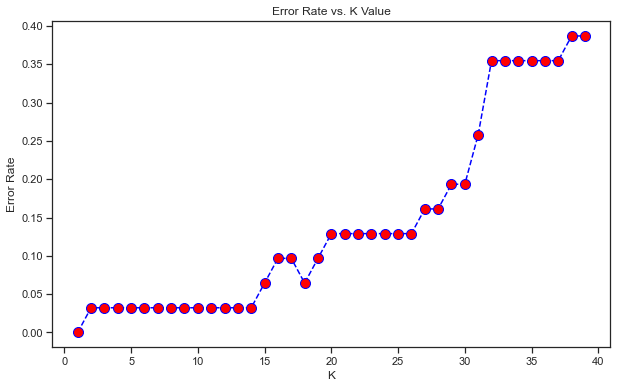

In [93]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
#plotting Different k values vs Error rate
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [94]:
#Quick comparison to our original k=1 (approx minimun error according to the above graph) 
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[13  0  0  0  0]
 [ 0  7  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  0  4]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         4

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



In [95]:
#Now with k=37 (approx maximum error according to the above graph) 
knn = KNeighborsClassifier(n_neighbors=37)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=37')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))
#more error rate or lesser accuracy

WITH K=37


[[13  0  0  0  0]
 [ 0  7  0  0  0]
 [ 6  0  0  0  0]
 [ 0  1  0  0  0]
 [ 0  3  0  1  0]]


              precision    recall  f1-score   support

           1       0.68      1.00      0.81        13
           2       0.64      1.00      0.78         7
           4       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         4

    accuracy                           0.65        31
   macro avg       0.26      0.40      0.32        31
weighted avg       0.43      0.65      0.52        31



c:\users\nitin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nitin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\nitin\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# Decision tree classifier


In [96]:
#Creating decision tree classifier and trainig the model using dataset
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [97]:
#Representing the resultant decision tree in textual format
text_representation = tree.export_text(dtree)
print(text_representation)

|--- feature_0 <= -0.17
|   |--- class: 1
|--- feature_0 >  -0.17
|   |--- feature_2 <= -1.15
|   |   |--- class: 2
|   |--- feature_2 >  -1.15
|   |   |--- feature_1 <= -1.98
|   |   |   |--- class: 6
|   |   |--- feature_1 >  -1.98
|   |   |   |--- feature_1 <= 2.69
|   |   |   |   |--- feature_2 <= 1.31
|   |   |   |   |   |--- feature_3 <= -0.75
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- feature_3 >  -0.75
|   |   |   |   |   |   |--- class: 5
|   |   |   |   |--- feature_2 >  1.31
|   |   |   |   |   |--- feature_1 <= 0.44
|   |   |   |   |   |   |--- class: 7
|   |   |   |   |   |--- feature_1 >  0.44
|   |   |   |   |   |   |--- feature_1 <= 0.76
|   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |--- feature_1 >  0.76
|   |   |   |   |   |   |   |--- class: 7
|   |   |   |--- feature_1 >  2.69
|   |   |   |   |--- class: 4



In [98]:
#Predictions and evaluations
predictions = dtree.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7
           4       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         4

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31



In [99]:
#Calculating accuracy score for decision tree and appending it to the accuracy-scores list
from sklearn.metrics import accuracy_score
sc=accuracy_score(y_test, predictions)
scrs.append(sc)

# Random forest classifier

In [100]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 77)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=77)

In [101]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
#Calculating accuracy score for Random Forest and appending it to the accuracy-scores list
from sklearn.metrics import accuracy_score
sc=accuracy_score(y_test, y_pred)
scrs.append(sc)

In [102]:
#Printing accuracy
print(sc)

0.967741935483871


# Gradient boosting algorithm

In [103]:
from sklearn.ensemble import GradientBoostingRegressor

In [104]:
gb_model = GradientBoostingRegressor(max_depth=3, n_estimators=250, learning_rate=0.2, random_state=76)

In [105]:
#Training gradient boosting model
gb_model.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.2, n_estimators=250, random_state=76)

In [106]:
predictions = gb_model.predict(x_test)

In [107]:
from sklearn.metrics import r2_score, mean_squared_error

In [108]:
#Calculating accuracy score for Gradient boosting classifier
sc = gb_model.score(x_test, y_test)
print(sc)


0.9893213757973985


In [109]:
#Finding mean-squared error
mean_squared_error(y_test, predictions)

0.046825933808285695

In [110]:
#Appending accuracy it to the accuracy-scores list
scrs.append(sc)

# Naive Bayes Classifier


In [111]:
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(x_train, y_train)
gnb_predictions = gnb.predict(x_test)

In [112]:
#Calculating accuracy score for Naive Bayes classifier model and appending it to the accuracy-scores list
sc = gnb.score(x_test, y_test)
print(sc)
scrs.append(sc)

1.0


In [113]:
#Calculating accuracy using a different method (accuracy_score)
accuracy_score(y_test, gnb_predictions)

1.0

# Comparison of All 5 Algorithms

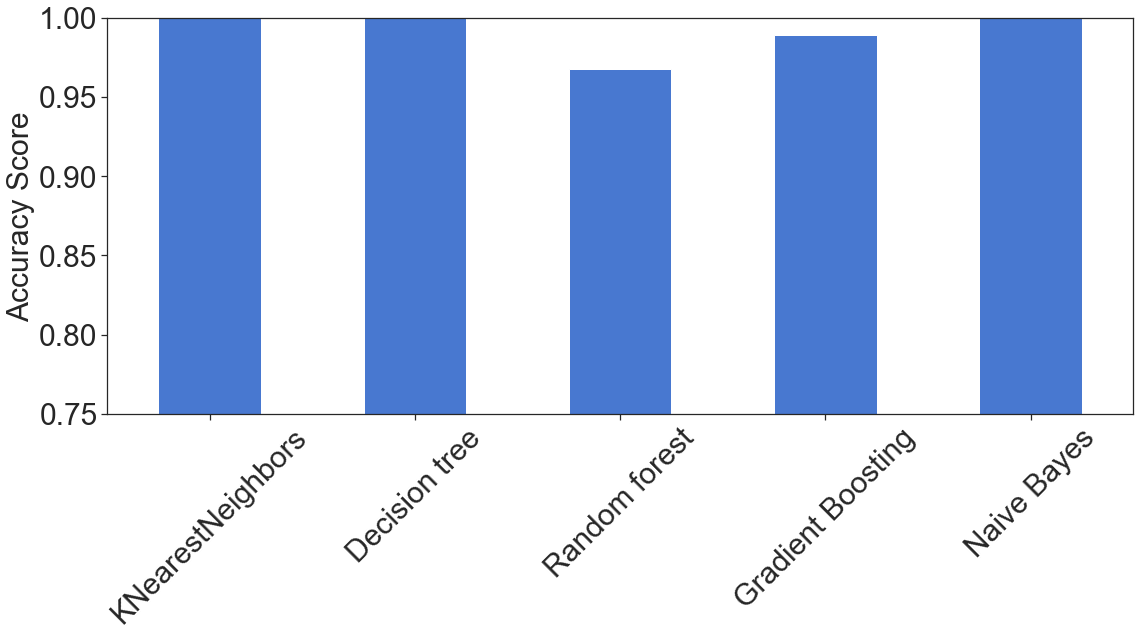

In [114]:
#Labeling each value in accuracy-scores list according to the corresponding model used.
Acc_scores = pd.Series(scrs, ['KNearestNeighbors','Decision tree', 'Random forest','Gradient Boosting','Naive Bayes'])
from matplotlib.colors import ListedColormap
current_palette = sns.color_palette("muted", n_colors=5)
cmap = ListedColormap(sns.color_palette(current_palette).as_hex())
# Make the bar Plot
Acc_scores.plot(x='Classifiers', y='Accuracy scores',kind = 'bar',figsize=(16,9), rot=45, fontsize=30, colormap=cmap)
plt.xlabel('', fontsize=30)
plt.ylabel('Accuracy Score', fontsize=30)
plt.ylim([0.75,1])
# Show the plot
plt.tight_layout()
plt.show()

# Conclusion

#### Parameters selection

Random forests: 
- n_estimators: This is the number of trees you want to build before taking the maximum voting or averages of predictions. Higher number of trees give you better performance choose as high value as your processor can handle because this makes your predictions stronger and more stable.
- random_state: This parameter makes a solution easy to replicate. A definite value of random_state will always produce same results if given with same parameters and training data.
- Criterion: The function to measure the quality of a split. We supply value as entropy for the information gain.Gini method works only when the target variable is a binary variable. Hence we have used entropy.

K- Nearest Neighbors:
- k value: The number of most similar neighbors that are used to determine class of the data point. We observe that k=1 yields the best result.


Gradient Boosting classifier:
- learning_ratefloat, default=0.1: Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate and n_estimators. We have chosen 0.2 as the learning rate. 
- n_estimatorsint: The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance. We have chosen 250. Regardless of the value chosen for n estimators because of choosing learning rate value as 0.2 the accuracy doesnt change.
- max_depthint, default=3: The maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. We have tuned this parameter to 3 for best performance; the best value depends on the interaction of the input variables. 
- random_stateint, RandomState instance or None, default=None: Controls the random seed given to each Tree estimator at each boosting iteration. In addition, it controls the random permutation of the features at each split. It also controls the random splitting of the training data to obtain a validation set if n_iter_no_change is not None. Pass an int for reproducible output across multiple function calls.

#### Accuracy of the classifiers


- K Nearest Neighbors Classifier(for k=1) = 1
- Decision Tree Classifier = 1
- Random Forest Classifier = 0.967741935483871
- Gradient Boosting Classifier = 0.9893213757973985
- Naive Bayes Classifier = 1
    

After implementing the above models, we can come to the conclusion that K- Nearest Neighbors with K=1, Decision Tree classifier and Naive Bayes are the best suited multiclass classification algorithms for our dataset.

### Comparison of the models with the highest accuracy:

Decision tree vs KNN:
- Both are non-parametric methods.
- Decision tree supports automatic feature interaction, whereas KNN cant.
- Decision tree is faster due to KNN’s expensive real time execution.


Decision tree vs Naive Bayes:
- Decision tree is a discriminative model, whereas Naive bayes is a generative model.
- Decision trees are more flexible and easy.
- Decision tree pruning may neglect some key values in training data, which can lead the accuracy for a toss.


KNN vs Naive bayes:
- Naive bayes is much faster than KNN due to KNN’s real-time execution.
- Naive bayes is parametric whereas KNN is non-parametric.


#### When compared using execution speed, we were able to conclude that KNN is the slowest out of the three models with the highest accuracy. Although Decision tree and Naive bayes are equally fast, Decision tree may neglect some important key values in the training data while pruning which will result in the reduction of the accuracy.

#### Therefore, we observe that Naive Bayes classifier showed the best performance for multi-class classification for our dataset.